In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from pyha import *
from pyha.cores import *
from pyha.cores.util import *
import scipy
from scipy import signal
import warnings
warnings.filterwarnings('ignore') # yolo!
import numpy as np

# GitHub cannot display the Table of Contents!

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Info
Combines multiple Pyha cores to calculate a spectrogram with average pooling feature. See individual components for more info.

# Examples

INFO:sim:Running "MODEL" simulation...
INFO:sim:Running "PYHA" simulation...
100%|██████████| 2048/2048 [00:01<00:00, 1766.76it/s]
INFO:sim:Flushing the pipeline to collect 128 valid samples (currently have 0)
INFO:sim:Hardware delay is 1191


<IPython.core.display.Javascript object>


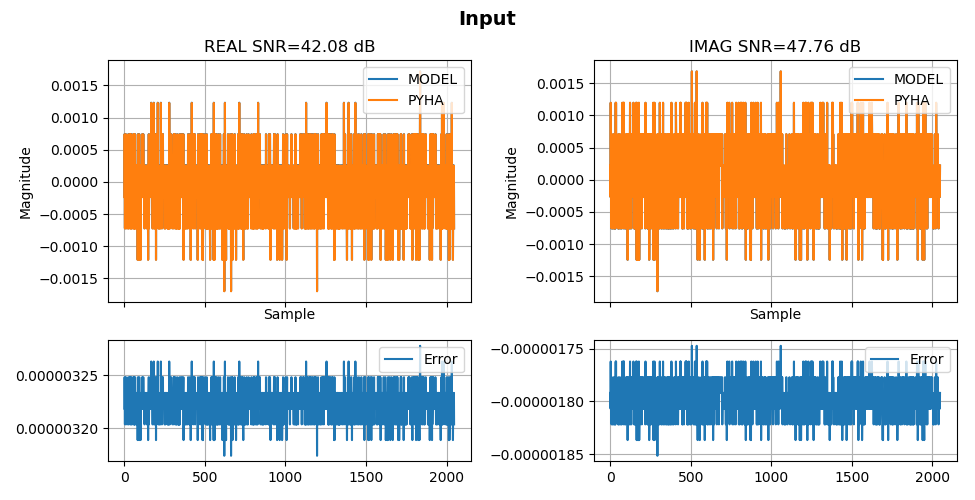

<IPython.core.display.Javascript object>


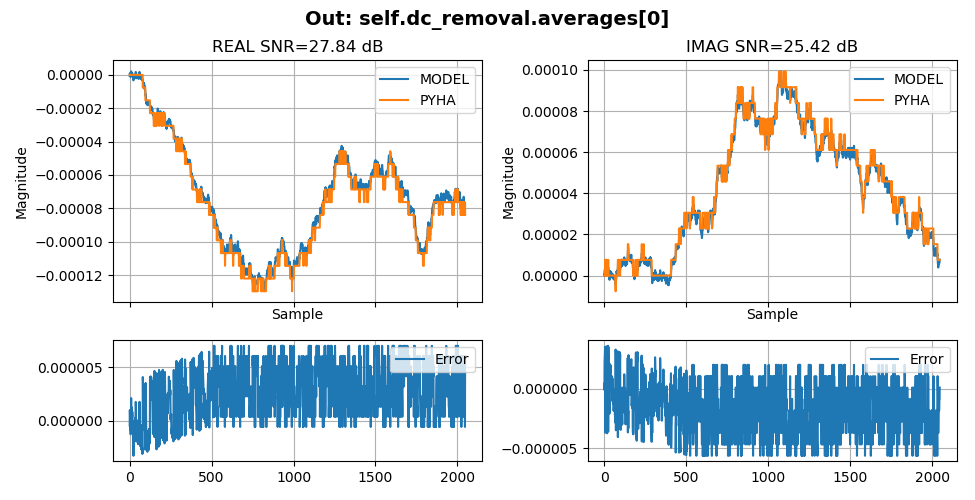

<IPython.core.display.Javascript object>


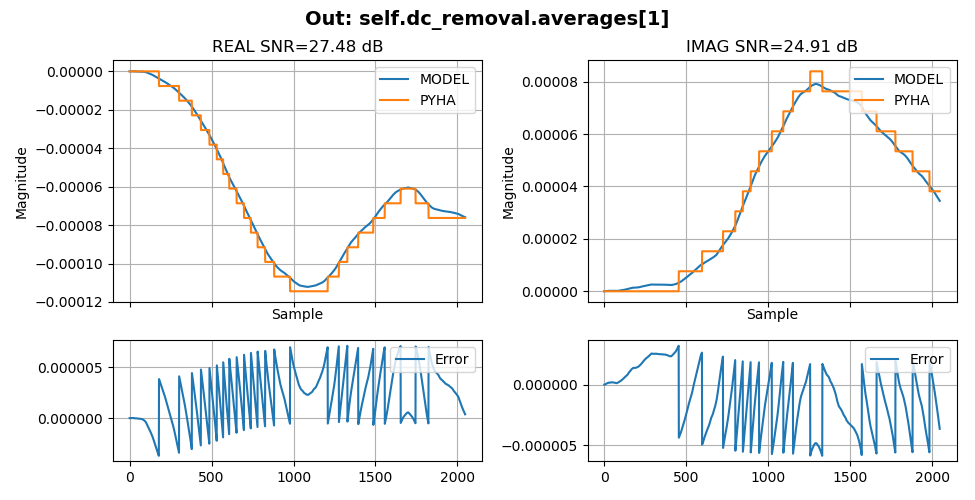

<IPython.core.display.Javascript object>


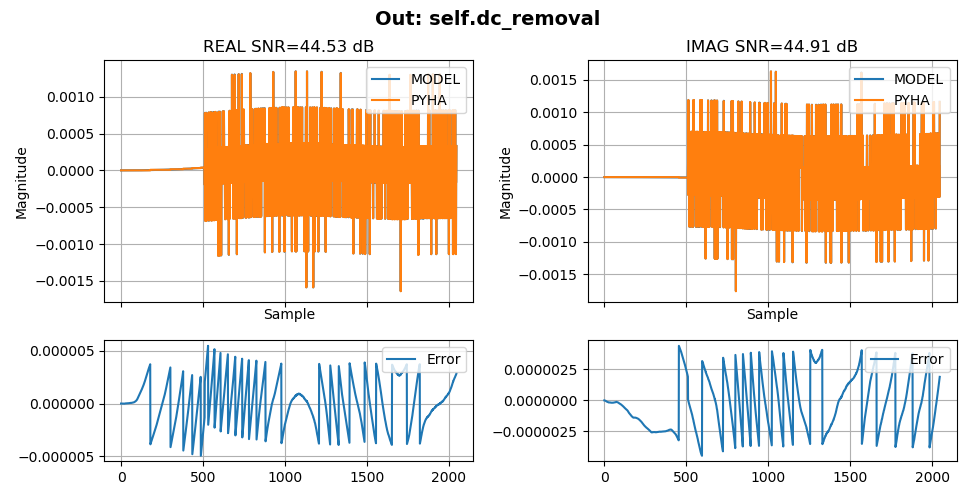

<IPython.core.display.Javascript object>


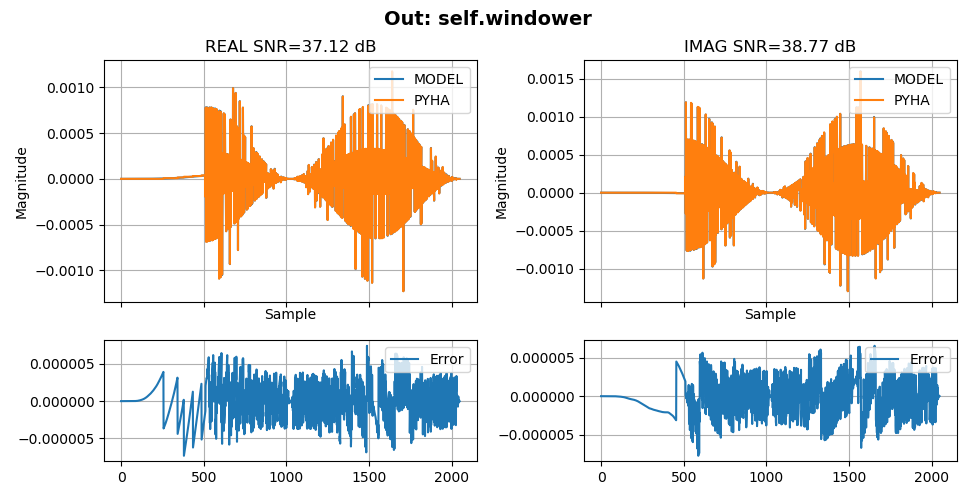

<IPython.core.display.Javascript object>


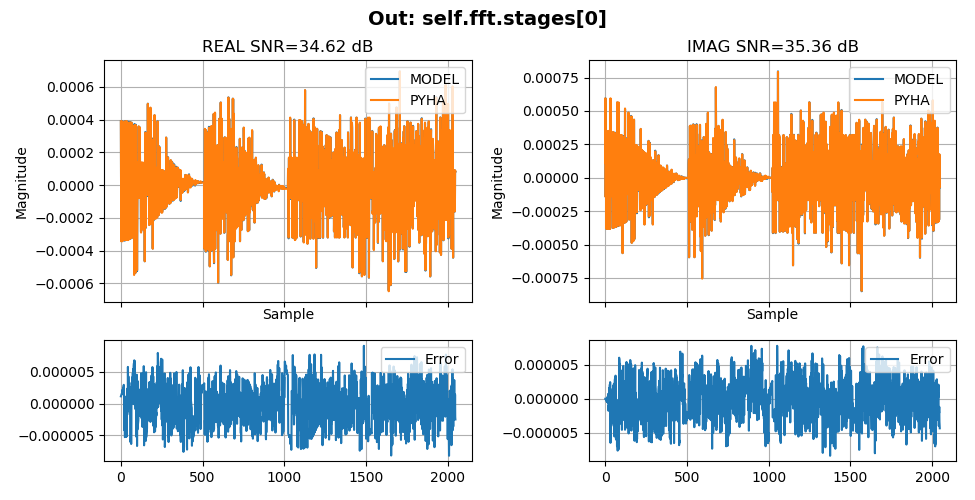

<IPython.core.display.Javascript object>


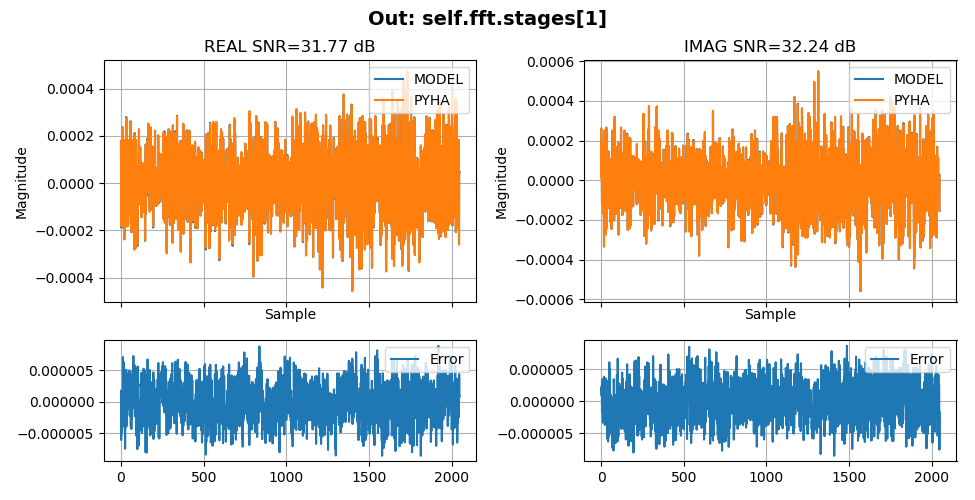

<IPython.core.display.Javascript object>


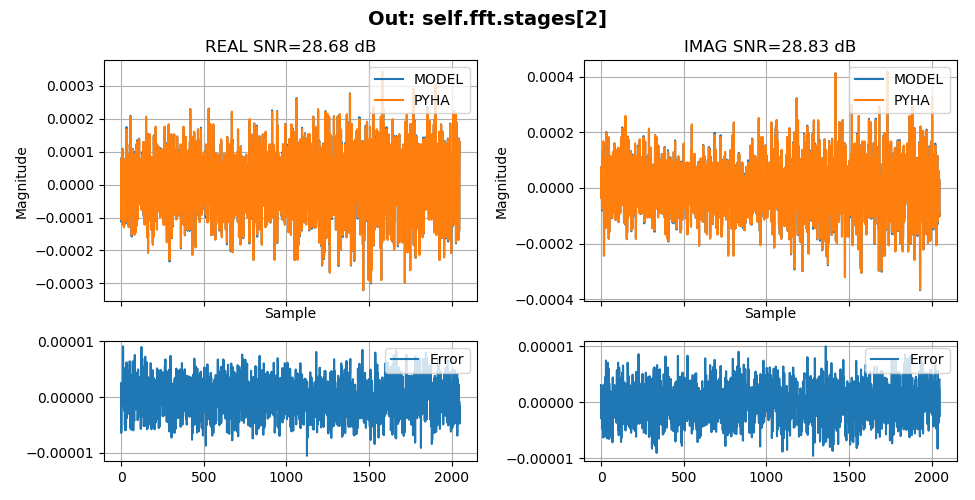

<IPython.core.display.Javascript object>


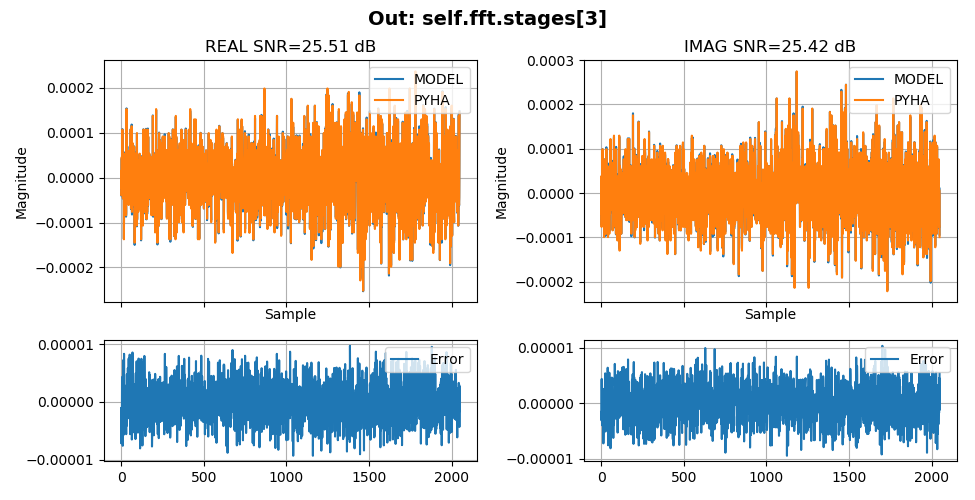

<IPython.core.display.Javascript object>


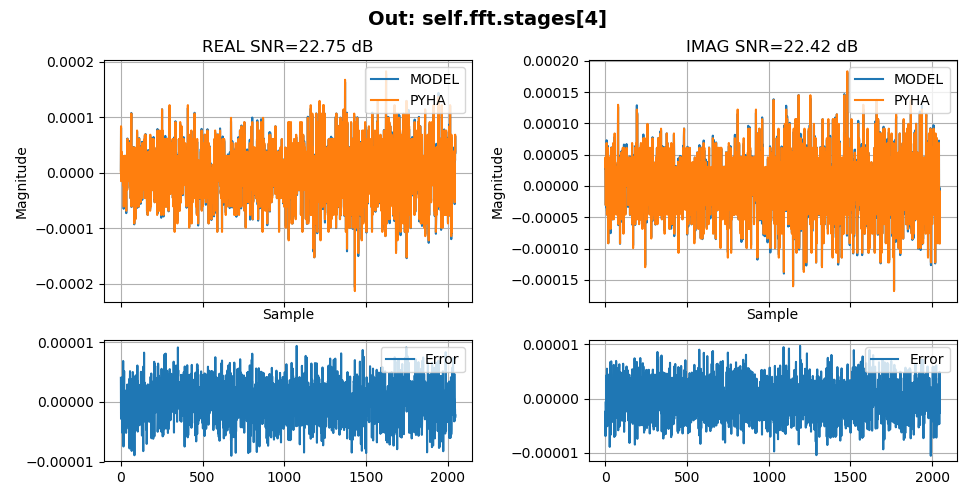

<IPython.core.display.Javascript object>


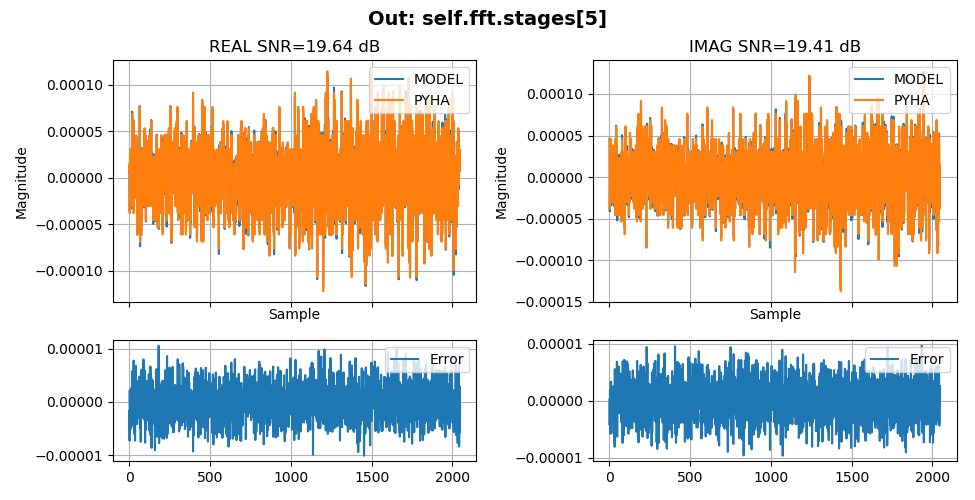

<IPython.core.display.Javascript object>


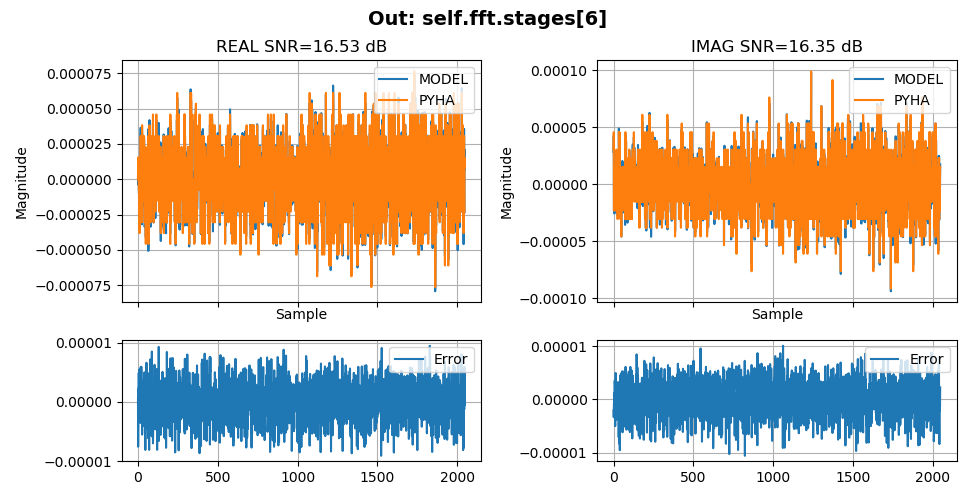

<IPython.core.display.Javascript object>


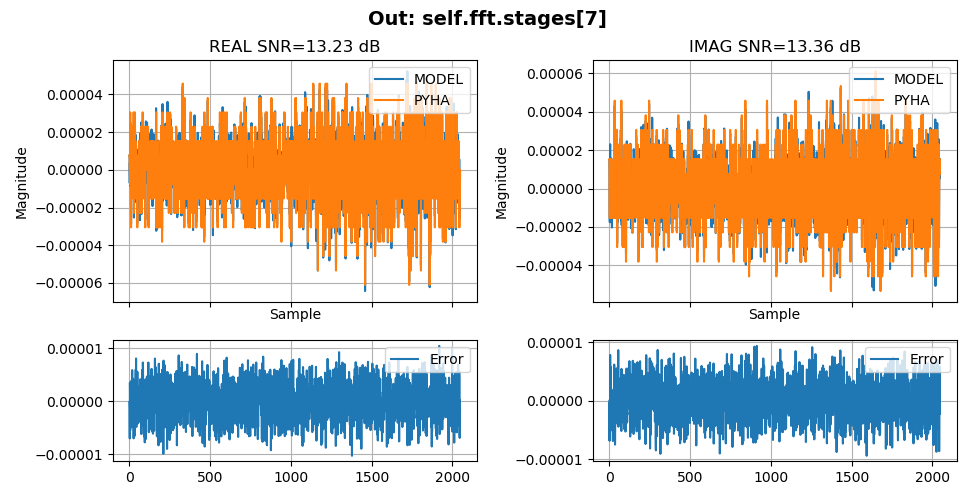

<IPython.core.display.Javascript object>


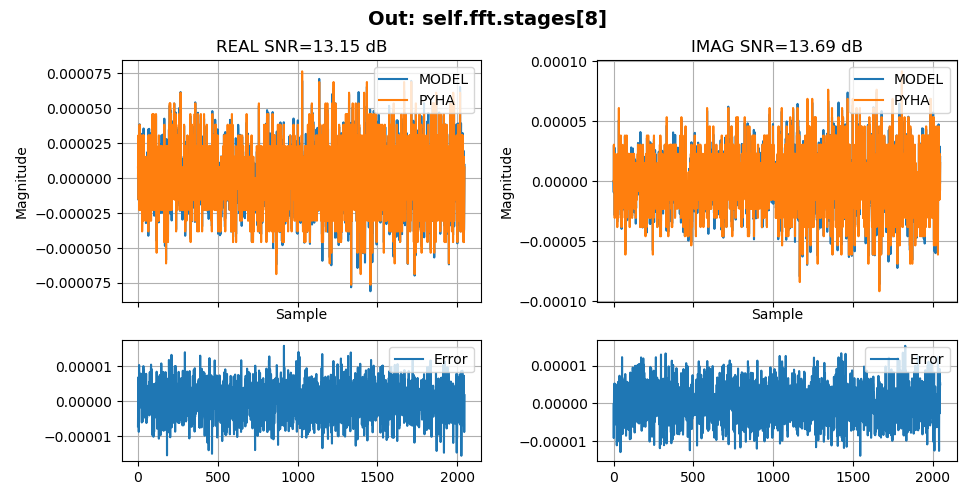

<IPython.core.display.Javascript object>


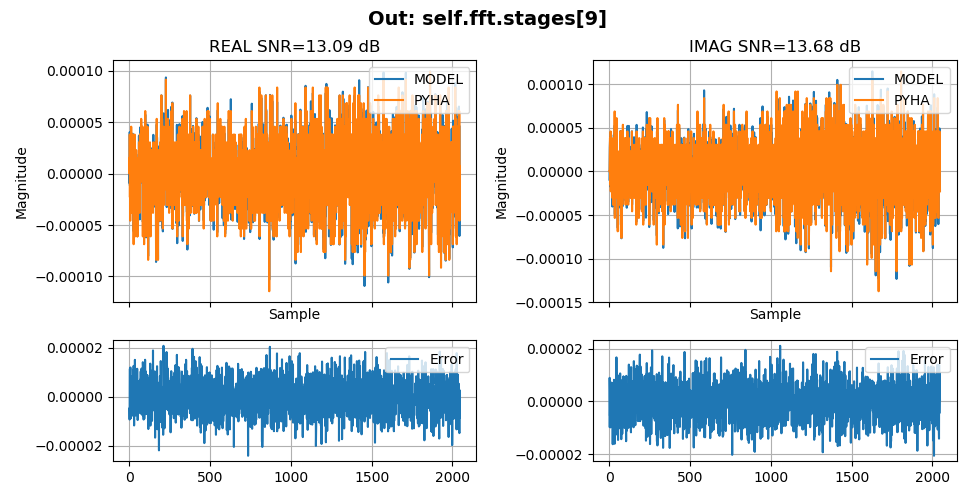

<IPython.core.display.Javascript object>


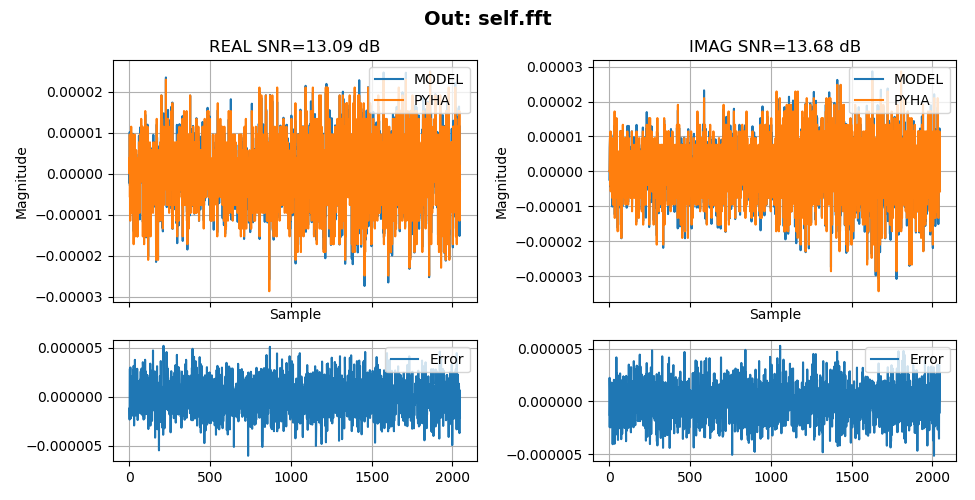

<IPython.core.display.Javascript object>


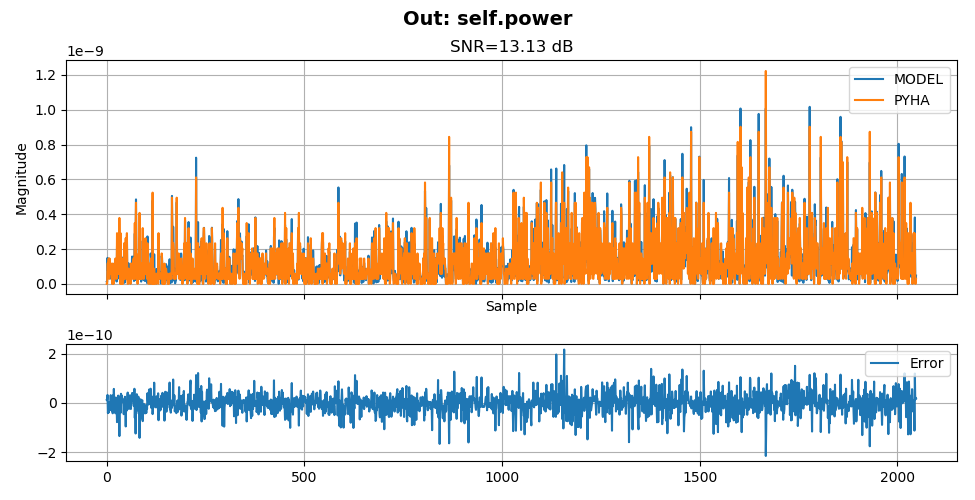

<IPython.core.display.Javascript object>


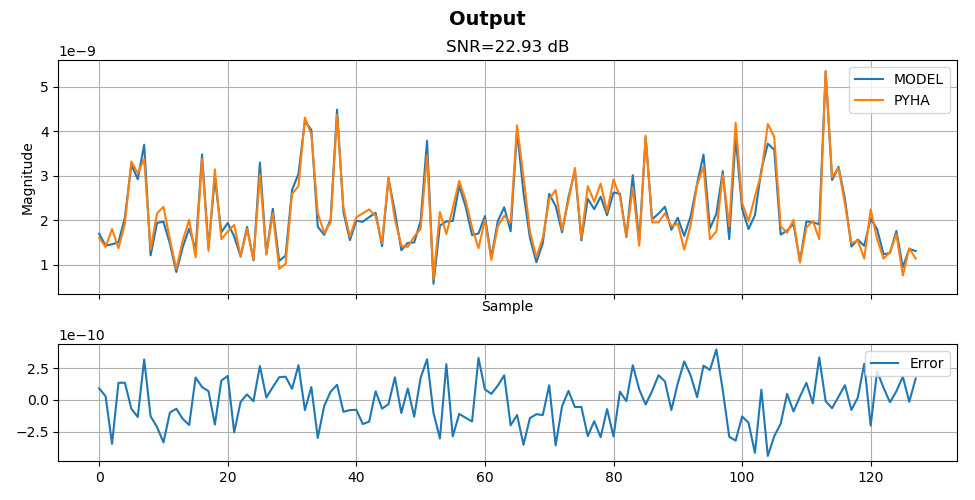

In [6]:
file = get_data_file('phantom3_low_power_bladerf.complex64')
input_signal = load_complex64_file(file)

fft_size = 1024
avg_freq_axis = 8
avg_time_axis = 2
dut = Spectrogram(fft_size, avg_freq_axis, avg_time_axis)
sims = Simulator(dut, trace=True).run(input_signal[:1024*2]) # run simulations and gather trace
sims.plot_trace()

In [3]:
sims.plot_trace(mode={'Input': None, 'Output': 'imshow'}, rows=len(input_signal) // fft_size // avg_time_axis, transpose=True, inout_only=True)

<IPython.core.display.Javascript object>

ValueError: cannot reshape array of size 128 into shape (68,newaxis)

# Conversion to VHDL and RTL/NETLIST simulations

In [ ]:
# Pyha design can be converted to VHDL after the PYHA simulation has been ran
# VHDL sources can be used to run the RTL simulation, in addition NETLIST simulation is supported (after Quartus mapper)
# Pyha automatically manages everything needed if you specify the 'RTL', 'NETLIST' flags.
output_dir = '~/Documents/pyha_output'
dut = Spectrogram(fft_size, avg_freq_axis, avg_time_axis, fft_twiddle_bits=9, window_bits=8)
vhdl_sim = Simulator(dut, output_dir=output_dir, extra_simulations=['RTL', 'NETLIST']).run(input_signal[:fft_size*avg_time_axis*2])
vhdl_sim.assert_equal(atol=1e-3, rtol=1e-3)

# Synthesis:  resource usage and Fmax

In [ ]:
print(vhdl_sim.quartus.get_resource_usage('fit'))
print(vhdl_sim.quartus.get_fmax())

In [ ]:
# 1024 dut = Spectrogram(fft_size, avg_freq_axis=16, avg_time_axis=1, fft_twiddle_bits=9, window_bits=8)
# INFO:sim:Total logic elements : 5,117
# INFO:sim:    Total combinational functions : 4,820
# INFO:sim:    Dedicated logic registers : 2,514
# INFO:sim:Total registers : 2514
# INFO:sim:Total pins : 78
# INFO:sim:Total virtual pins : 0
# INFO:sim:Total memory bits : 59,004
# INFO:sim:Embedded Multiplier 9-bit elements : 80

# dut = Spectrogram(fft_size, avg_freq_axis=8, avg_time_axis=1, fft_twiddle_bits=9, window_bits=8)
# INFO:sim:Family : Cyclone IV E
# INFO:sim:Total logic elements : 5,125
# INFO:sim:    Total combinational functions : 4,829
# INFO:sim:    Dedicated logic registers : 2,519
# INFO:sim:Total registers : 2519
# INFO:sim:Total pins : 78
# INFO:sim:Total virtual pins : 0
# INFO:sim:Total memory bits : 63,612
# INFO:sim:Embedded Multiplier 9-bit elements : 80

In [ ]:
# INFO:sim:Family : Cyclone IV E
# INFO:sim:Total logic elements : 10,821
# INFO:sim:    Total combinational functions : 10,527
# INFO:sim:    Dedicated logic registers : 3,171
# INFO:sim:Total registers : 3171
# INFO:sim:Total pins : 78
# INFO:sim:Total virtual pins : 0
# INFO:sim:Total memory bits : 607,140
# INFO:sim:Embedded Multiplier 9-bit elements : 104